In [118]:
import os
import numpy as np
import librosa as lb
import soundfile as sf
from pydub import AudioSegment

In [119]:
from matplotlib import pyplot as plt
from librosa import display

In [120]:
path = "/home/rajesh/Desktop/"

In [121]:
mixture, fs = lb.load(path+'mixture.wav')
vocal, fs = lb.load(path+'vocals.wav')
mridangam, fs = lb.load(path+'mridangam.wav')
violin, fs = lb.load(path+'violin.wav')

In [122]:
mixture.shape, vocal.shape, mridangam.shape, violin.shape

((220500,), (220500,), (220500,), (220500,))

In [14]:
max_m, min_m = np.max(mixture), np.min(mixture)
max_m, min_m

(0.6835022, -0.84503174)

In [15]:
max_v, min_v = np.max(vocal), np.min(vocal)
max_mr, min_mr = np.max(mridangam), np.min(mridangam)
max_vi, min_vi = np.max(violin), np.min(violin)

max_v, min_v, max_mr, min_mr, max_vi, min_vi

(0.05987549, -0.07354736, 0.2555542, -0.22421265, 0.03137207, -0.033355713)

In [16]:
changed_vocal = np.interp(vocal,[min_v, max_v], [min_m, max_m])
changed_mridangam = np.interp(mridangam,[min_mr, max_mr], [min_m, max_m])
changed_violin = np.interp(violin,[min_vi, max_vi], [min_m, max_m])

In [17]:
sf.write(path+'processed_vocals.wav', changed_vocal, fs)
sf.write(path+'processed_mridangam.wav', changed_mridangam, fs)
sf.write(path+'processed_violin.wav', changed_violin, fs)

In [18]:
hpf_mridangam_ = AudioSegment.from_wav(path+"processed_mridangam.wav")
hpf_mridangam = hpf_mridangam_.high_pass_filter(30)
hpf_mridangam.export(path+"hpf_mridangam.wav", "wav")

<_io.BufferedRandom name='/home/rajesh/Desktop/Saraga/hpf_mridangam.wav'>

In [19]:
hpf_mrid, fs = lb.load(path+'hpf_mridangam.wav')
stft_hpf_mrid = lb.stft(hpf_mrid)

In [32]:
hpf_violin_ = AudioSegment.from_wav(path+"processed_violin.wav")
hpf_violin = hpf_violin_.high_pass_filter(30)
hpf_violin.export(path+"hpf_violin.wav", "wav")

<_io.BufferedRandom name='/home/rajesh/Desktop/Saraga/hpf_violin.wav'>

In [33]:
hpf_vi, fs = lb.load(path+'hpf_violin.wav')
stft_hpf_vi = lb.stft(hpf_vi)

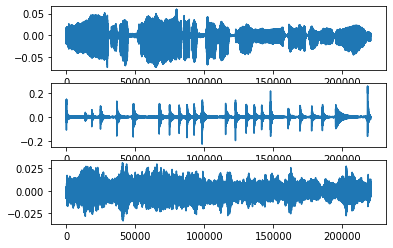

In [21]:
plt.subplot(3, 1, 1)
plt.plot(vocal)
plt.subplot(3, 1, 2)
plt.plot(mridangam)
plt.subplot(3, 1, 3)
plt.plot(violin)
plt.show()

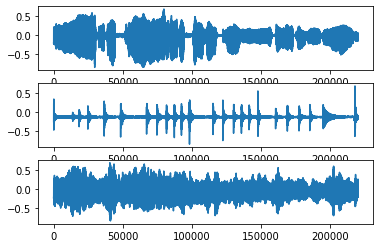

In [22]:
plt.subplot(3, 1, 1)
plt.plot(changed_vocal)
plt.subplot(3, 1, 2)
plt.plot(changed_mridangam)
plt.subplot(3, 1, 3)
plt.plot(changed_violin)
plt.show()

In [23]:
cvstft = lb.stft(changed_vocal)
cmrstft = lb.stft(changed_mridangam)
cvistft = lb.stft(changed_violin)

vstft = lb.stft(vocal)
mrstft = lb.stft(mridangam)
vistft = lb.stft(violin)

mstft = lb.stft(mixture)

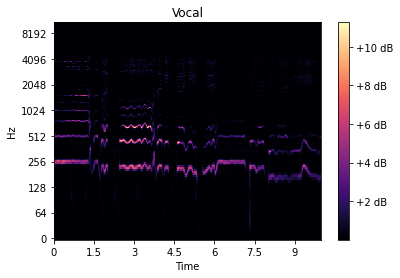

In [24]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(vstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Vocal')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

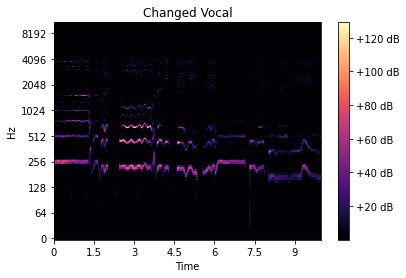

In [25]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(cvstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Changed Vocal')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

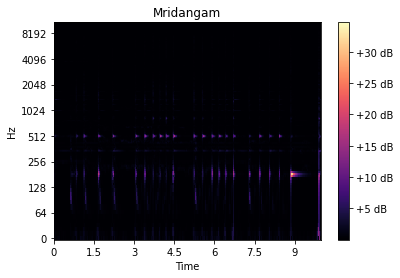

In [26]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(mrstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Mridangam')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

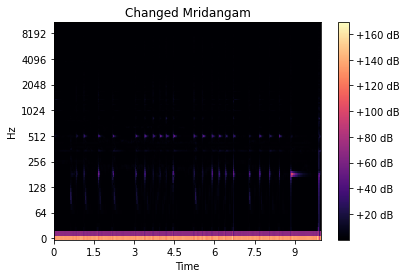

In [27]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(cmrstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Changed Mridangam')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

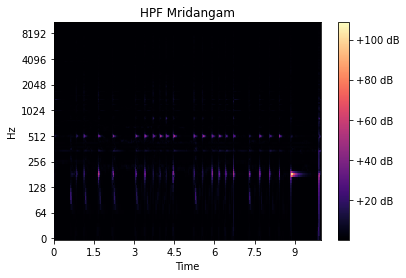

In [28]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(stft_hpf_mrid), x_axis='time', y_axis='log', ax=ax)
ax.set(title='HPF Mridangam')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

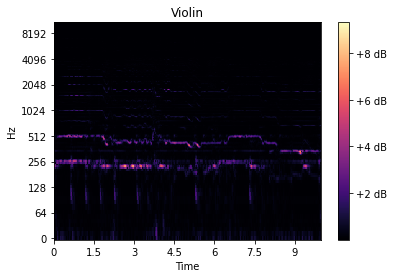

In [29]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(vistft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Violin')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

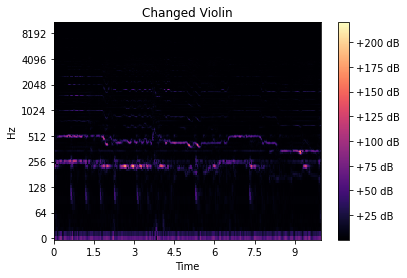

In [30]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(cvistft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Changed Violin')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

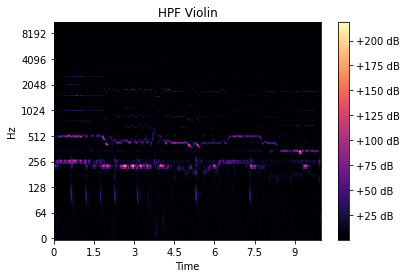

In [36]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(stft_hpf_vi), x_axis='time', y_axis='log', ax=ax)
ax.set(title='HPF Violin')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

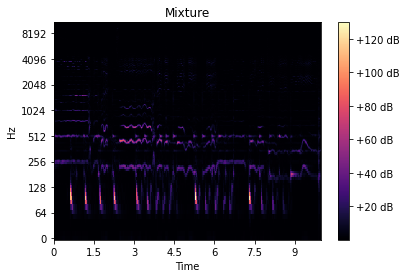

In [31]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(mstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Mixture')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

### GAIN EQUALIZE

In [40]:
pydb_mixture = AudioSegment.from_file(path+'mixture.wav')
pydb_vocal = AudioSegment.from_file(path+'vocals.wav')
pydb_mridangam = AudioSegment.from_file(path+'mridangam.wav')
pydb_violin = AudioSegment.from_file(path+'violin.wav')

#### Method 1

In [43]:
pydb_vocal_process1 = pydb_vocal.apply_gain(+18.29)
pydb_mridangam_process1 = pydb_mridangam.apply_gain(+18.29)
pydb_violin_process1 = pydb_violin.apply_gain(+18.29)

In [45]:
pydb_vocal_process1.dBFS, pydb_mridangam_process1.dBFS, pydb_violin_process1.dBFS

(-19.697321506292003, -18.966117795281214, -25.2373929079507)

In [46]:
pydb_vocal.dBFS, pydb_mridangam.dBFS, pydb_violin.dBFS

(-37.98999766606634, -37.11067469779735, -43.539868827102254)

In [56]:
pydb_mixture.dBFS

-19.697321506292003

In [48]:
pydb_vocal_process1.export(path+"vocalp1.wav", "wav")
pydb_mridangam_process1.export(path+"mridangamp1.wav", "wav")
pydb_violin_process1.export(path+"violinp1.wav", "wav")

<_io.BufferedRandom name='/home/rajesh/Desktop/Saraga/violinp1.wav'>

In [53]:
pydb_mridangam

In [54]:
pydb_mridangam_process1

#### Method II

In [79]:
pydb_vocal_process2 = pydb_vocal.apply_gain(+18.29)
pydb_mridangam_process2 = pydb_mridangam.apply_gain(+17.53)
pydb_violin_process2 = pydb_violin.apply_gain(+23.83)

pydb_vocal_process2.dBFS, pydb_mridangam_process2.dBFS, pydb_violin_process2.dBFS

(-19.697321506292003, -19.697321506292003, -19.697321506292003)

In [81]:
pydb_vocal_process2.export(path+"vocalp2.wav", "wav")
pydb_mridangam_process2.export(path+"mridangamp2.wav", "wav")
pydb_violin_process2.export(path+"violinp2.wav", "wav")

<_io.BufferedRandom name='/home/rajesh/Desktop/Saraga/violinp2.wav'>

In [82]:
pydb_mridangam_process2

In [83]:
vocalp2, fs = lb.load(path+'vocalp2.wav')
mridangamp2, fs = lb.load(path+'mridangamp2.wav')
violinp2, fs = lb.load(path+'violinp2.wav')

In [89]:
p2vstft = lb.stft(vocalp2)
p2mrstft = lb.stft(mridangamp2)
p2vistft = lb.stft(violinp2)

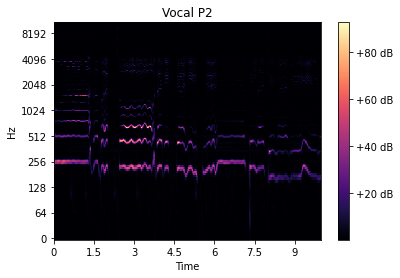

In [90]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(p2vstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Vocal P2')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

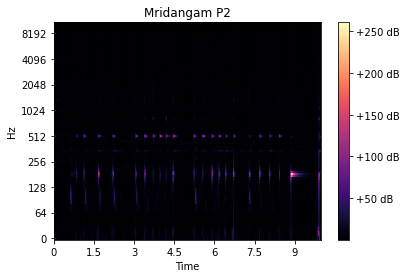

In [91]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(p2mrstft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Mridangam P2')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

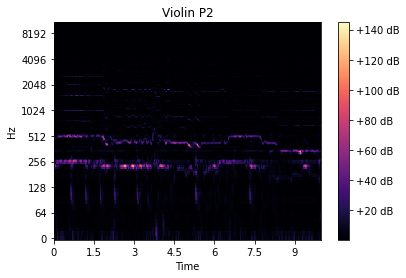

In [92]:
fig, ax = plt.subplots()
img = lb.display.specshow(np.abs(p2vistft), x_axis='time', y_axis='log', ax=ax)
ax.set(title='Violin P2')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

### GETTING FROM KAMIR

In [93]:
pathk = path+'KAMIR/'

In [97]:
mixture, fs = lb.load(path+'mixture.wav')
vocal, fs = lb.load(pathk+'pred_vocal.wav')
mridangam, fs = lb.load(pathk+'pred_mridangam.wav')
violin, fs = lb.load(pathk+'pred_violin.wav')

In [98]:
max_v, min_v = np.max(vocal), np.min(vocal)
max_mr, min_mr = np.max(mridangam), np.min(mridangam)
max_vi, min_vi = np.max(violin), np.min(violin)

max_v, min_v, max_mr, min_mr, max_vi, min_vi

(0.05834961, -0.07281494, 0.24697876, -0.21624756, 0.029724121, -0.027526855)

In [99]:
(0.05987549, -0.07354736, 0.2555542, -0.22421265, 0.03137207, -0.033355713)

(0.05987549, -0.07354736, 0.2555542, -0.22421265, 0.03137207, -0.033355713)

In [107]:
art_mix = 2*vocal + mridangam + 2*violin

In [101]:
sf.write(pathk+'art_mix.wav', art_mix, fs)

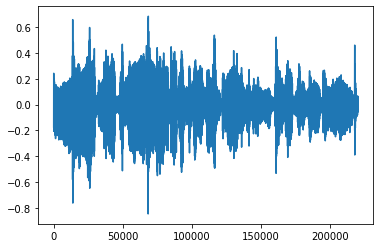

In [108]:
plt.plot(mixture)

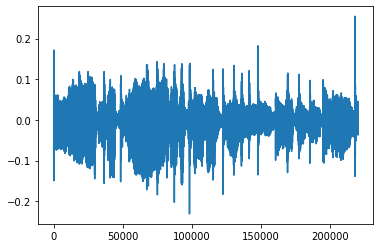

In [109]:
plt.plot(art_mix)

### Method III

In [113]:
Cvocal, fs = lb.load(pathk+'pred_vocal.wav')
Cmridangam, fs = lb.load(pathk+'pred_mridangam.wav')
Cviolin, fs = lb.load(pathk+'pred_violin.wav')
att_mix, fs = lb.load(pathk+'art_mix.wav')

In [115]:
vocal, fs = lb.load(path+'vocals.wav')
mridangam, fs = lb.load(path+'mridangam.wav')
violin, fs = lb.load(path+'violin.wav')
mixture, fs = lb.load(path+'mixture.wav')

In [117]:
coeff = mixture @ np.linalg.pinv([Cvocal, Cmridangam, Cviolin])
coeff

array([0.83382577, 1.5030332 , 0.05593537], dtype=float32)